In [1]:
# assign integer ids to each individual
import numpy as np
import pandas as pd
def assign_integer_ids(df):
    # Extracting unique individual_ids
    unique_ids = df["individual_id"].unique()
    
    # Shuffling the unique IDs
    np.random.shuffle(unique_ids)
    
    # Mapping each unique ID to an integer
    id_to_integer = {id: i+1 for i, id in enumerate(unique_ids)}
    
    # Adding a new column to the DataFrame
    df["individual_id_integer"] = df["individual_id"].map(id_to_integer)
    
    return df


df_train = pd.read_csv('/mnt/g/Datasets/Whale_Dolphin_Identification/train_new.csv')
updated_df = assign_integer_ids(df_train)
# updated_df.to_csv('/mnt/g/Datasets/Whale_Dolphin_Identification/train_new1.csv', index=False)

In [4]:
# add train_val column
df_train = pd.read_csv('/mnt/g/Datasets/Whale_Dolphin_Identification/train_new1.csv')
root_path = '/mnt/e/Temp_data/Whale_Dolphin_Identification/Square/'
# walk through the train and val folder and add train_val column
import os
import pandas as pd
import numpy as np

file_dict = {}
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        # Splitting the path to get the list of directories
        path_parts = dirpath.split(os.sep)
        
        # If there are at least 3 directories in the path, get the 2nd upper-level folder
        if len(path_parts) >= 3:
            folder = path_parts[-2]  # 2nd upper-level folder
            file_dict[filename] = folder

df_train['train_val'] = df_train['new_filename'].map(file_dict)
# df_train.to_csv('/mnt/g/Datasets/Whale_Dolphin_Identification/train_new2.csv', index=False)

(224, 224, 3) 1.0 0.0
(3, 224, 224) 1.0 0.0


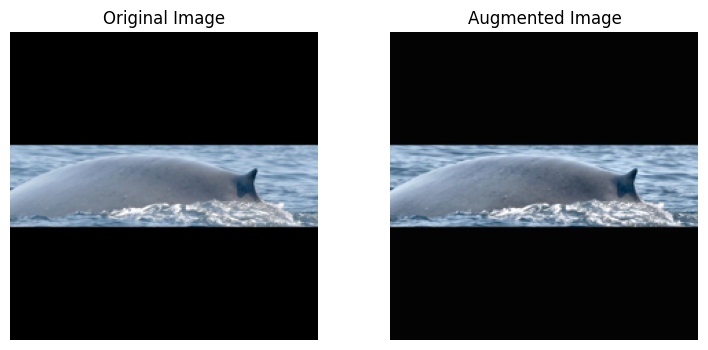

(224, 224, 3) 1.0 0.0
(3, 224, 224) 1.0 0.011764706


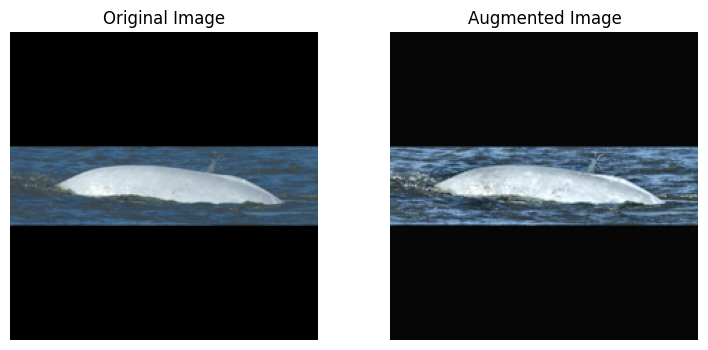

(224, 224, 3) 1.0 0.0
(3, 224, 224) 1.0 0.011764706


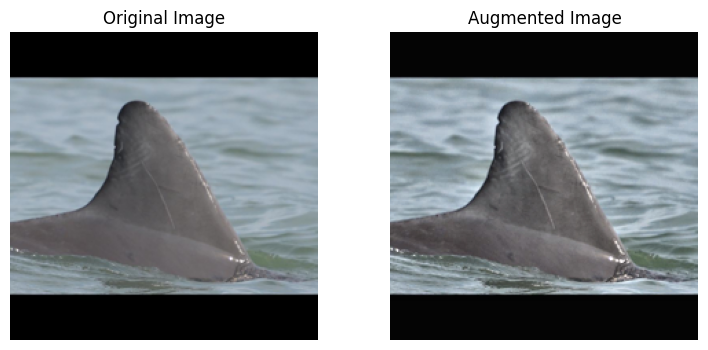

(224, 224, 3) 0.9294117647058824 0.0
(3, 224, 224) 1.0 0.015686275


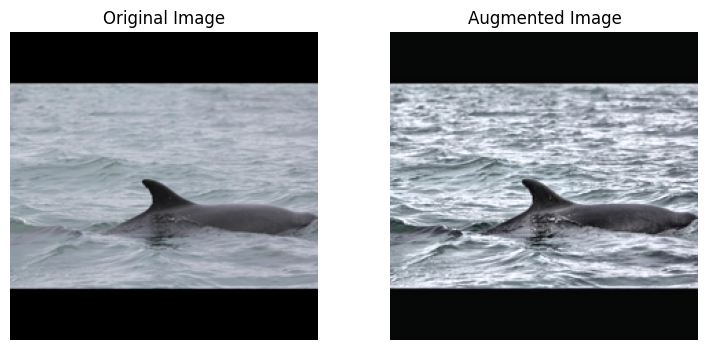

(224, 224, 3) 0.6352941176470588 0.0
(3, 224, 224) 0.96862745 0.015686275


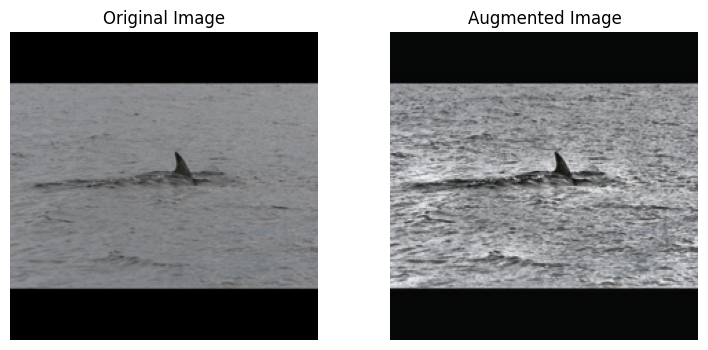

(224, 224, 3) 0.9764705882352941 0.0
(3, 224, 224) 1.0 0.0


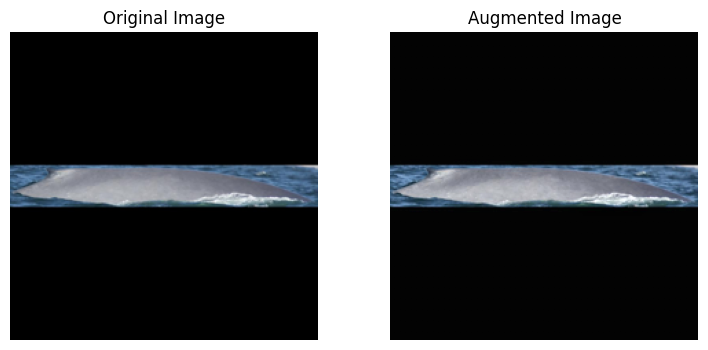

(224, 224, 3) 1.0 0.0
(3, 224, 224) 1.0 0.0


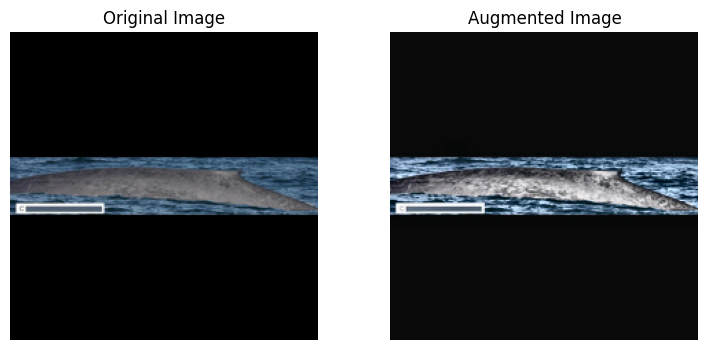

(224, 224, 3) 0.984313725490196 0.0
(3, 224, 224) 1.0 0.0


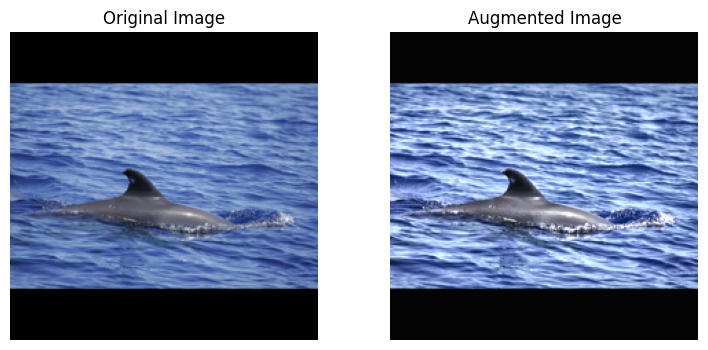

(224, 224, 3) 0.9882352941176471 0.0
(3, 224, 224) 1.0 0.0


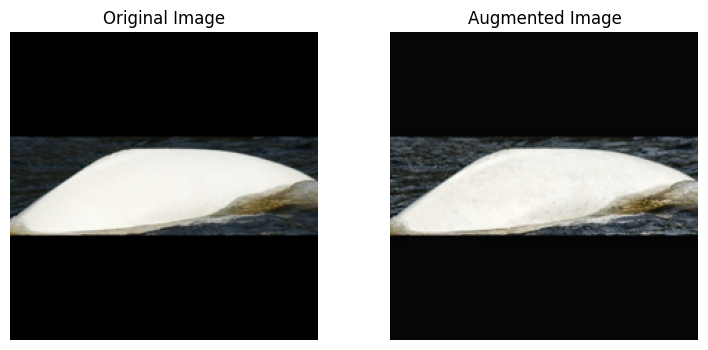

(224, 224, 3) 0.7176470588235294 0.0
(3, 224, 224) 1.0 0.0


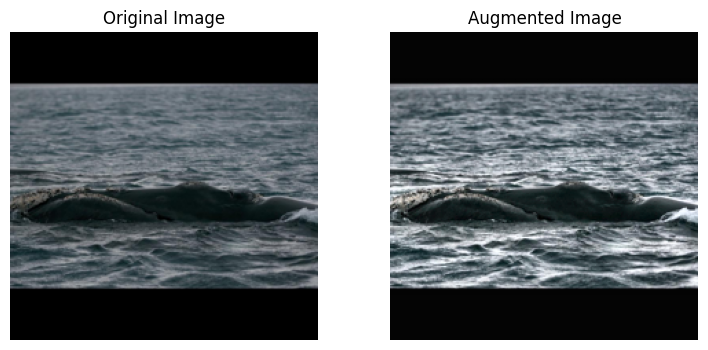

In [2]:
"""
To visualize the augmentation on a few images, you can follow the steps below:

Load a few images.
Apply the transformation pipeline train_transform to each image.
Display the original and augmented images side by side using matplotlib.

Remember to change path_to_your_images to the directory where your images are located. 
The code will display the original and augmented images side by side for the first five images in the directory. 
This will allow you to inspect the effects of your augmentation pipeline.
"""
import os, random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from torchvision.transforms import ToPILImage
import sys
sys.path.append('/home/yilu/Development/open_clip/Whale_Dolphin_Identification')
from image_augmentation import customized_augmentation

image_size = 224
color_image = False
train_transform = customized_augmentation(image_size, color_image, training_purpose=False)

to_pil = ToPILImage()

def visualize_augmentations(original_img, augmented_img):
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    ax[0].imshow(original_img) #, cmap="gray"
    ax[0].set_title("Original Image")
    ax[1].imshow(augmented_img)
    ax[1].set_title("Augmented Image")
    for a in ax:
        a.axis("off")
    plt.show()

# Setting the random seed
seed_value = 42
random.seed(seed_value)
# np.random.seed(seed_value)

# Load a few images
image_folder = '/mnt/e/Temp_data/Whale_Dolphin_Identification/Square/train/images/'
sample_images = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder)]
sample_images = random.sample(sample_images, 10)

for image_path in sample_images:
    original_img = Image.open(image_path).resize((image_size, image_size))
    print(np.array(original_img).shape, np.array(original_img).max()/255., np.array(original_img).min()/255.)
    augmented_img = train_transform(original_img)
    print(np.array(augmented_img).shape, np.array(augmented_img).max(), np.array(augmented_img).min())
    augmented_img = augmented_img.permute(1, 2, 0)  # Convert CxHxW to HxWxC for visualization
    # print(augmented_img.shape)
    
    #histogram for original image
    # image = original_img.convert('L')
    # Convert the image to a numpy array
    # histogram_original = np.array(image).ravel()
    
    # #histogram for augmented image
    # augmented_img_permuted = augmented_img.permute(2, 0, 1)
    # augmented_img_pil = to_pil(augmented_img_permuted)
    # augmented_img_gray = augmented_img_pil.convert('L')
    # # Convert the image to a numpy array
    # histogram_augmented = np.array(augmented_img_gray).ravel()
    
    # visualize_augmentations(original_img, augmented_img, histogram_original, histogram_augmented)
    visualize_augmentations(original_img, augmented_img)
    

In [2]:
print(train_transform.transforms)

[None, Compose(
    Lambda()
), Compose(
    ToTensor()
)]


22